In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/yonghyeun/Dementia_Analysis/main/%EC%A0%95%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0/%EC%9D%8C%EC%84%B1%EB%8D%B0%EC%9D%B4%ED%84%B0.csv')

In [4]:
plt.style.use('ggplot')

In [5]:
df[' Participant  code '] = df[' Participant  code '].map(lambda x : x[:2])

In [6]:
cols = [' Participant  code '] + df.columns.tolist()[41:]

In [7]:
data = df[cols]

data

,Participant code,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),...,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,PD,1.564,354,6.05,146,264,58.65,31.38,-2.101,-22.47,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,PD,1.564,340,27.52,173,253,48.26,22.38,-1.745,-24.59,...,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,PD,1.550,211,11.97,377,322,47.54,38.12,2.657,-16.89,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,PD,1.519,140,-2.49,360,663,13.72,44.88,-0.934,-25.54,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,PD,1.543,269,6.72,211,328,42.90,47.12,-0.973,-22.61,...,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,HC,1.564,265,3.58,198,365,40.25,26.88,-1.872,-28.04,...,8.43,264,380,36.36,26.88,0.023,-23.12,3.0,15.41,177
126,HC,1.547,291,6.31,183,359,39.59,31.37,-1.517,-22.87,...,4.09,177,359,47.06,22.37,-0.117,-18.67,5.0,16.94,138
127,HC,1.540,298,-13.66,177,283,53.01,50.50,-1.111,-22.91,...,5.09,223,391,37.74,40.37,0.411,-15.56,3.0,19.51,156
128,HC,1.560,359,-2.44,169,256,50.68,17.88,-0.823,-23.82,...,2.80,252,361,38.92,26.88,0.389,-17.53,4.0,17.51,154


In [8]:
color_map = {'PD':'red','RB':'blue','HC':'green'}


c_map = data.iloc[:,0].map(color_map)

In [9]:
target = data.iloc[:,0]

pca = PCA(n_components = 3)


X = pca.fit_transform(data.iloc[:,1:])

C:\Users\whileduck\AppData\Local\Temp\ipykernel_31172\3301886210.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticks(), rotation = -45)
C:\Users\whileduck\AppData\Local\Temp\ipykernel_31172\3301886210.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(ax[i].get_yticks(), rotation = 45)


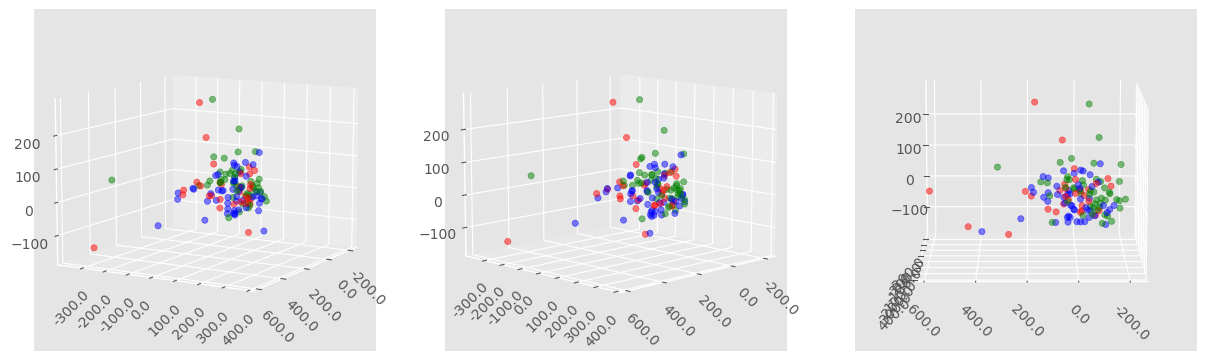

In [10]:
fig, ax = plt.subplots(ncols=3, subplot_kw={'projection': '3d'}, figsize=(15, 5))

view = (30, 45, 90)

for i in range(3):
    ax[i].scatter(X[:, 0], X[:, 1], X[:, 2], color=c_map, alpha=0.5)
    ax[i].set_xticklabels(ax[i].get_xticks(), rotation = -45)
    ax[i].set_yticklabels(ax[i].get_yticks(), rotation = 45)
    ax[i].view_init(10, view[i])

In [11]:
import seaborn as sns

In [12]:
data.columns

Index([' Participant  code ', ' Entropy  of  speech  timing  (-) ',
       ' Rate  of  speech  timing  (-/min) ',
       ' Acceleration  of  speech  timing  (-/min2) ',
       ' Duration  of  pause  intervals  (ms) ',
       ' Duration  of  voiced  intervals  (ms) ',
       ' Gaping  in-between  voiced  intervals  (-/min) ',
       ' Duration  of  unvoiced  stops  (ms) ',
       ' Decay  of  unvoiced  fricatives  (‰/min) ',
       ' Relative  loudness  of  respiration  (dB) ',
       ' Pause  intervals  per  respiration  (-) ',
       ' Rate  of  speech  respiration  (-/min) ',
       ' Latency  of  respiratory  exchange  (ms) ',
       ' Entropy  of  speech  timing  (-) .1',
       ' Rate  of  speech  timing  (-/min) .1',
       ' Acceleration  of  speech  timing  (-/min2) .1',
       ' Duration  of  pause  intervals  (ms) .1',
       ' Duration  of  voiced  intervals  (ms) .1',
       ' Gaping  in-between  voiced  Intervals  (-/min) ',
       ' Duration  of  unvoiced  stops  (ms) .1'

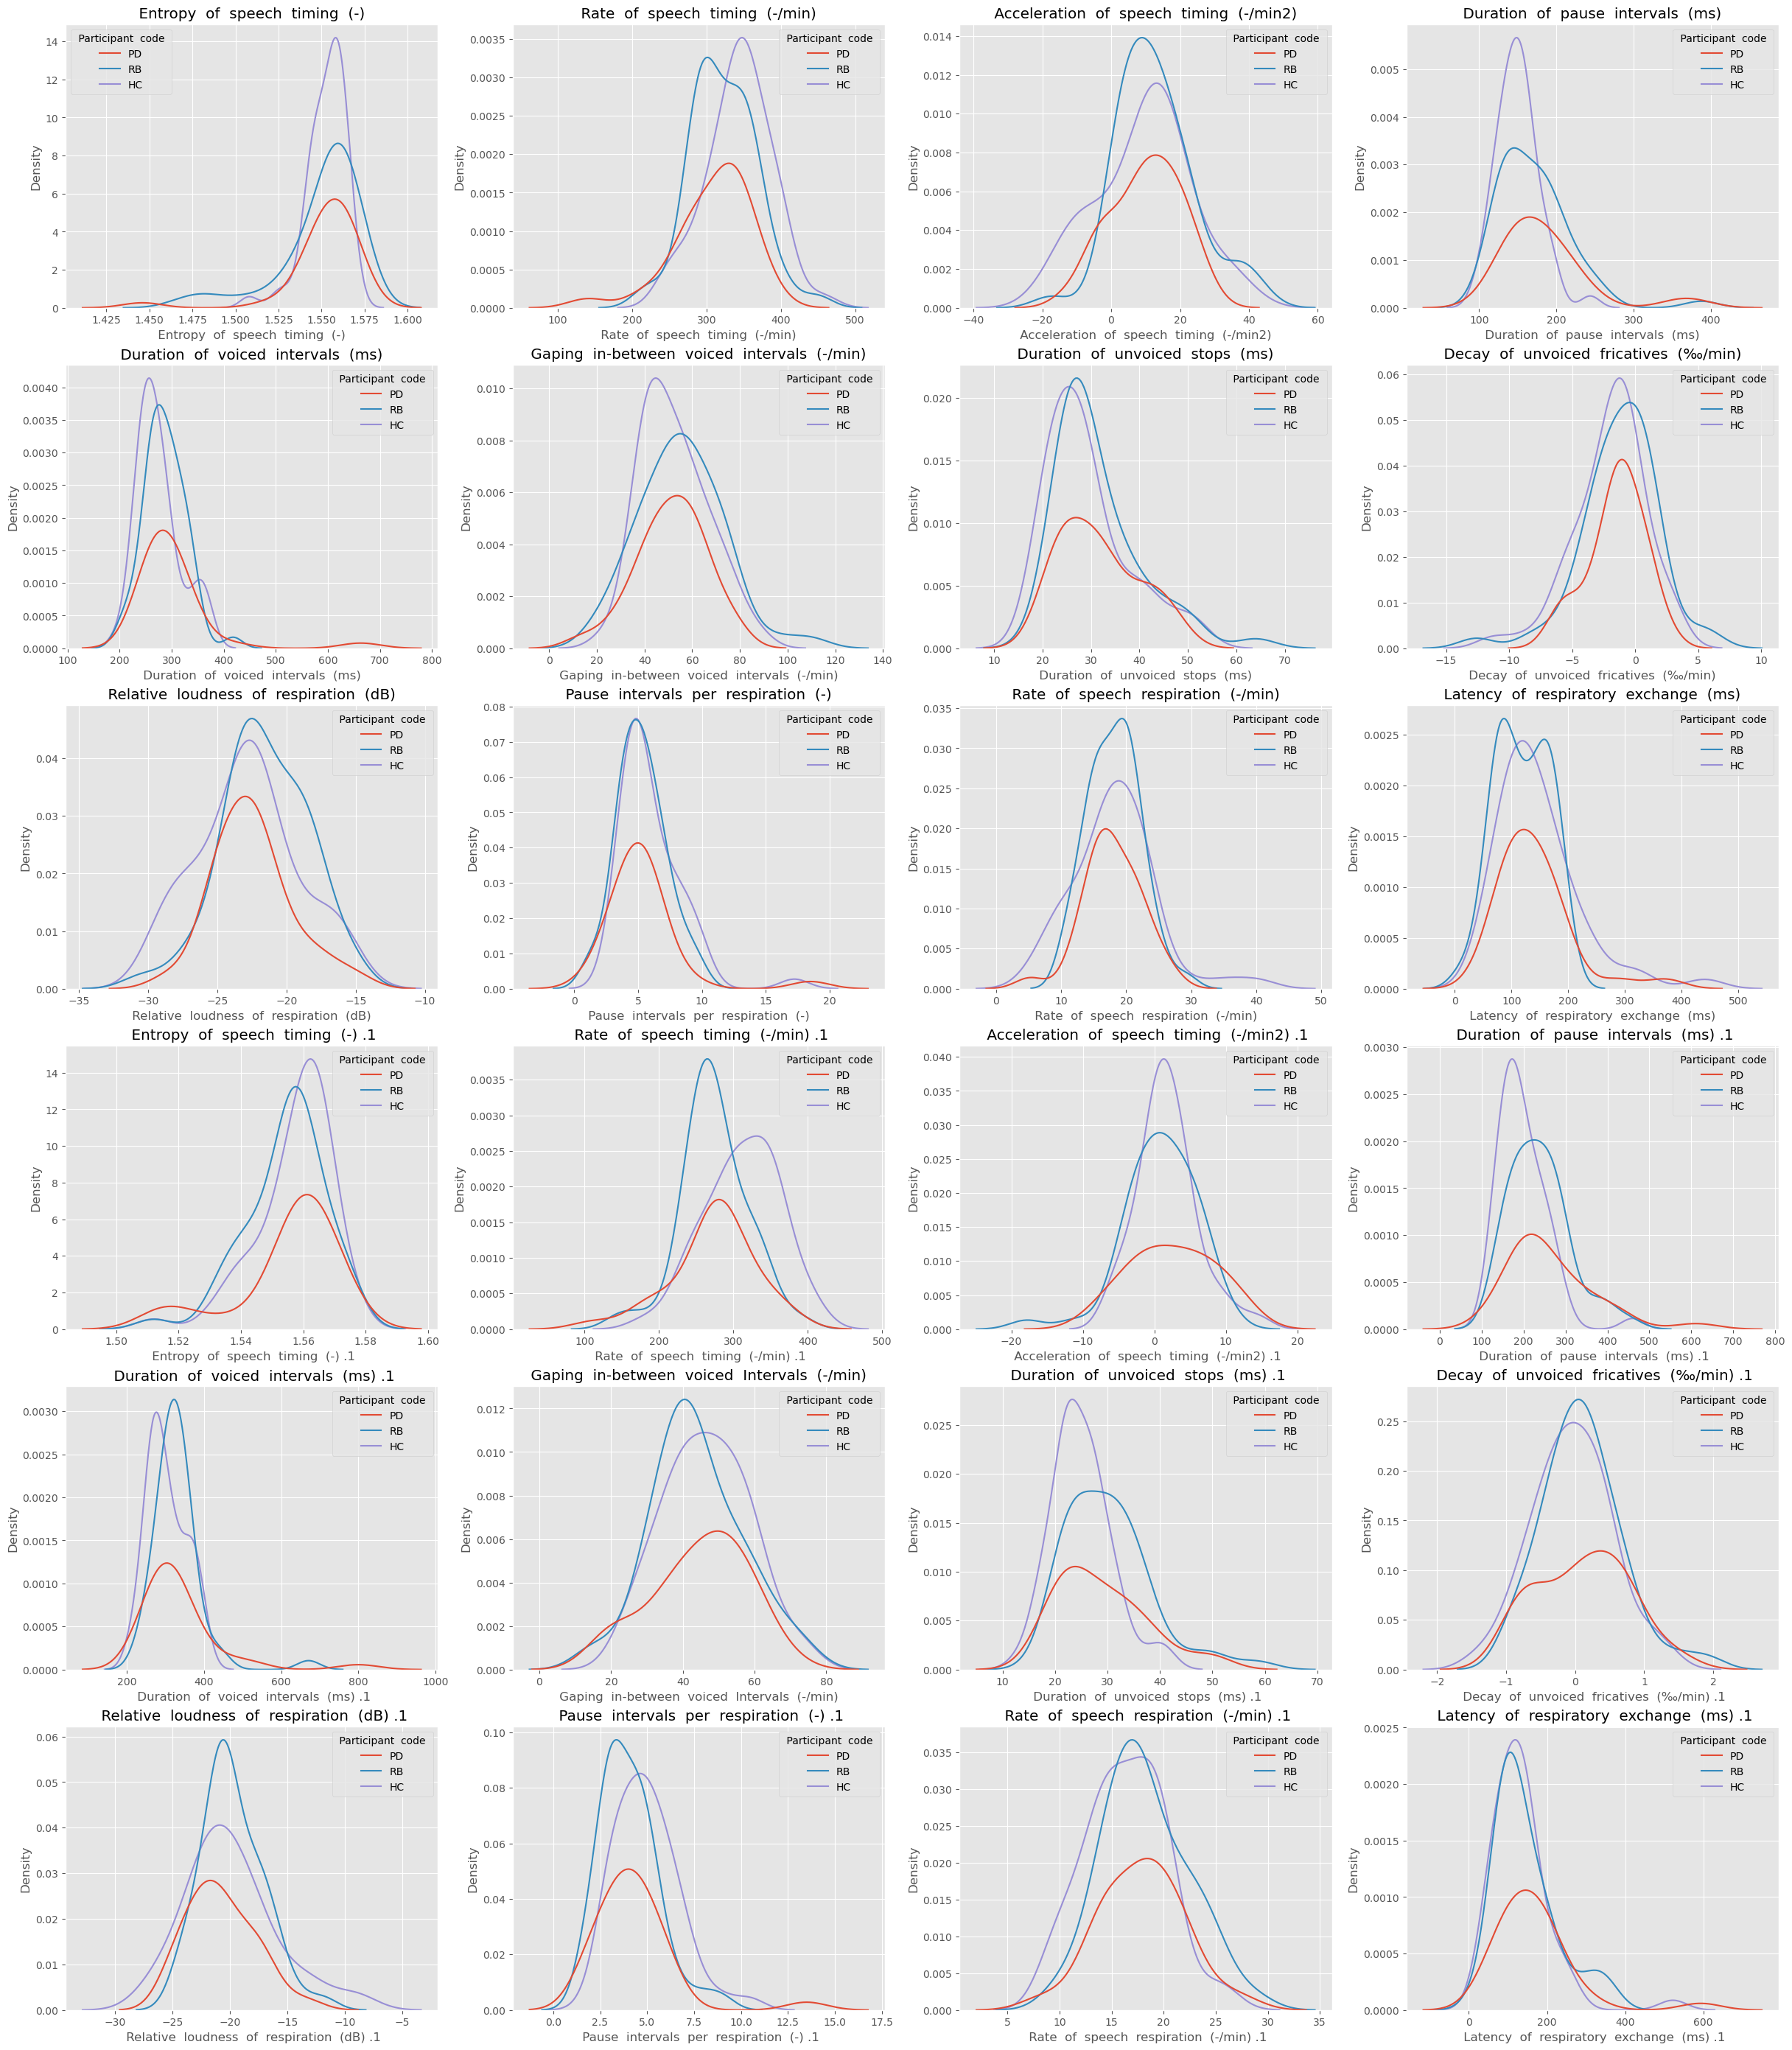

In [13]:
cols = data.columns[1:]

fig,ax = plt.subplots(ncols = 4, nrows = 6, 
                        figsize = (30,35))

ax = ax.flatten()

for i,var in enumerate(cols):
    
    sns.kdeplot(data = data,
                x = var,
                hue = ' Participant  code ',
                ax = ax[i])
    
    ax[i].set_title(var)
    

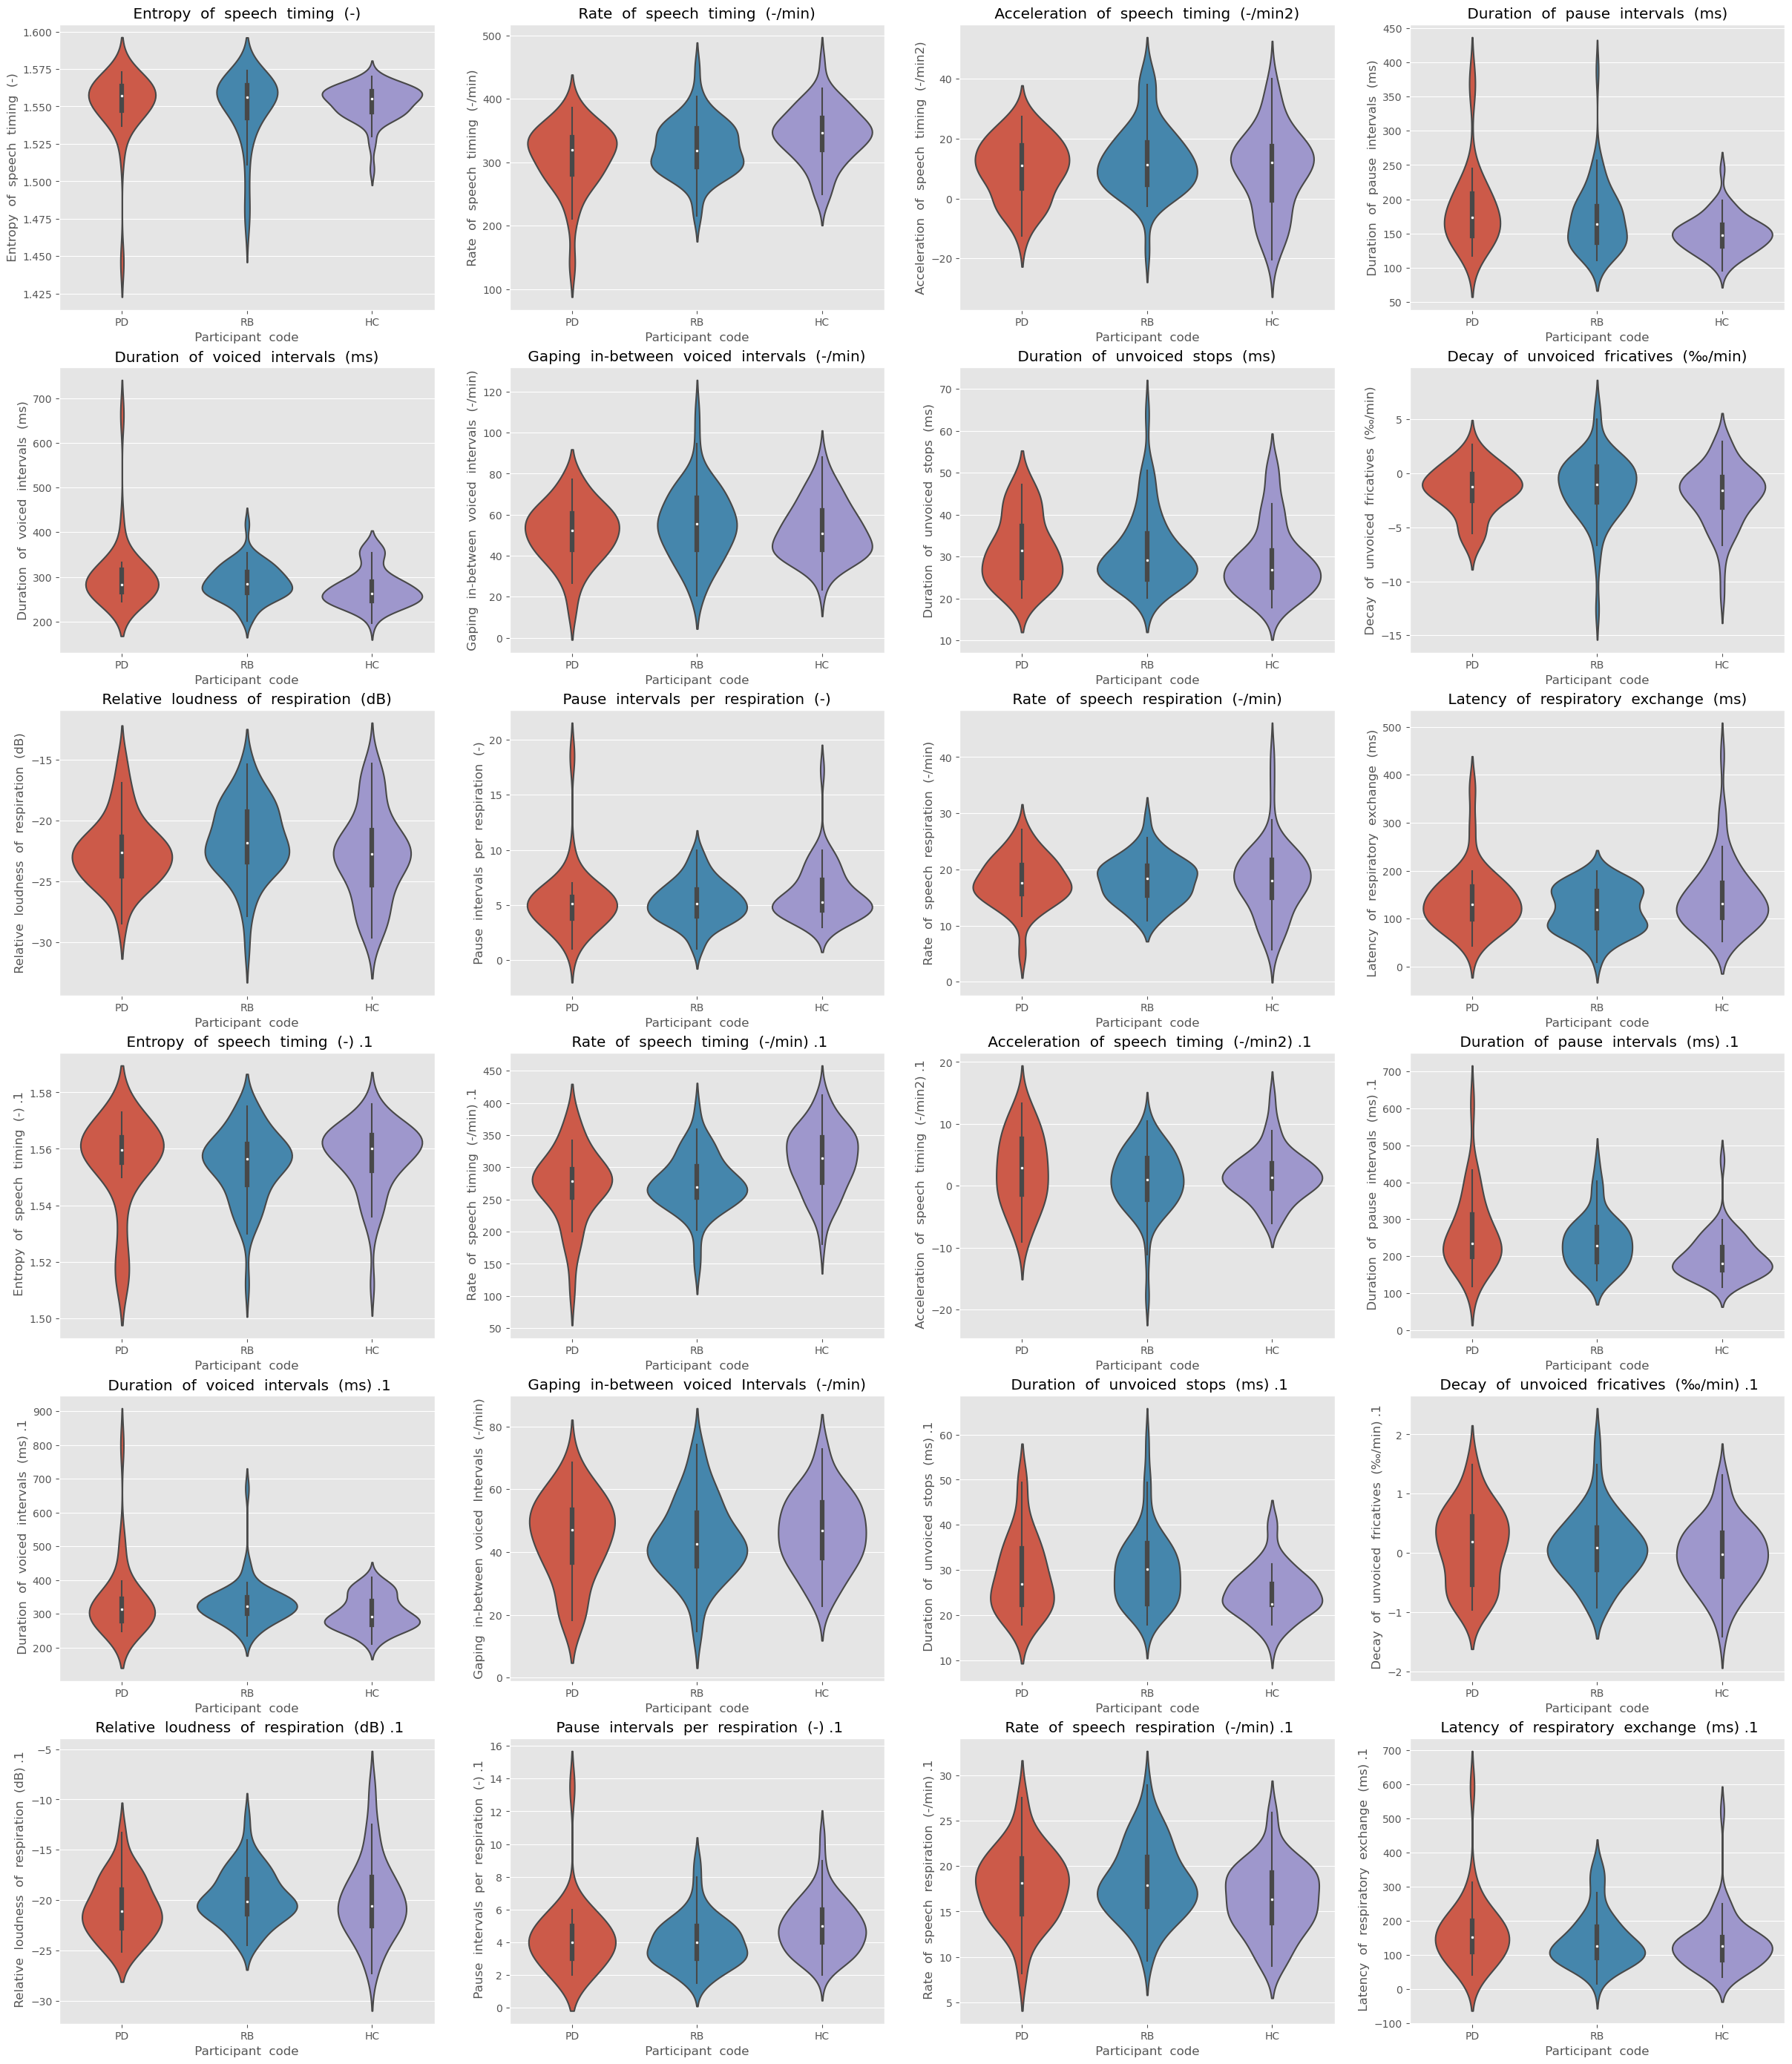

In [14]:
cols = data.columns[1:]

fig,ax = plt.subplots(ncols = 4, nrows = 6, 
                        figsize = (30,35))

ax = ax.flatten()

for i,var in enumerate(cols):
    
    sns.violinplot(data = data,
                y = var,
                x = ' Participant  code ',
                ax = ax[i],
                )
    
    ax[i].set_title(var)
    

In [15]:
plt.figure(figsize = (30,30))

sns.pairplot(data[cols])